<a href="https://colab.research.google.com/github/subhobrata/Udacity_Deeplearning_Udacity/blob/master/Neural_Networks_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
from torch.autograd import Variable


def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True


def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [0]:
# Import things like usual

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

In [0]:
#Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])

In [0]:
#Download and load training data
trainset = datasets.MNIST('MNIST_data',download=True,train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)


In [0]:
#Download and load testing data
testset = datasets.MNIST('MNIST_data',download=True,train=False,transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

In [0]:
dataiter = iter(trainloader)
images,labels = dataiter.next()

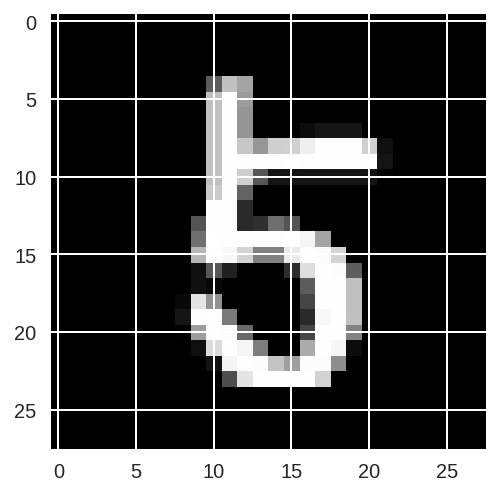

In [10]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

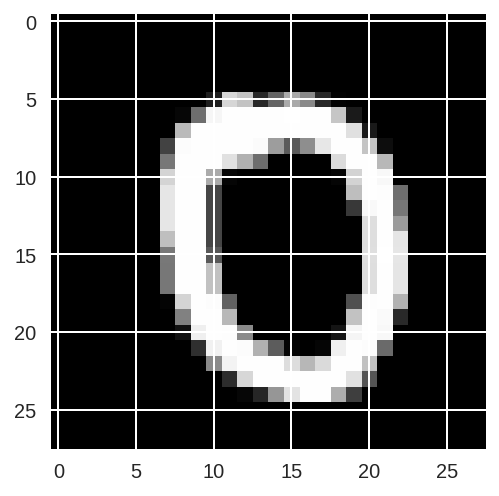

In [11]:
plt.imshow(images[2].numpy().squeeze(),cmap='Greys_r')

In [0]:
from torch import nn
from torch import optim
import torch.nn.functional as F


In [20]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        
        return x

model = Network()
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [22]:
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[-0.0334, -0.0274,  0.0030,  ..., -0.0052,  0.0061,  0.0184],
        [ 0.0354, -0.0021,  0.0300,  ..., -0.0251,  0.0120,  0.0215],
        [ 0.0080, -0.0352, -0.0357,  ..., -0.0248, -0.0229,  0.0172],
        ...,
        [ 0.0287, -0.0329,  0.0275,  ..., -0.0250,  0.0146,  0.0093],
        [-0.0264,  0.0153, -0.0122,  ..., -0.0012, -0.0008,  0.0279],
        [-0.0065,  0.0051, -0.0174,  ...,  0.0233,  0.0350, -0.0081]],
       requires_grad=True)
Parameter containing:
tensor([-0.0357, -0.0009, -0.0352,  0.0300, -0.0199,  0.0271, -0.0206,  0.0276,
        -0.0027,  0.0238,  0.0137, -0.0167, -0.0315,  0.0182,  0.0069,  0.0308,
         0.0272, -0.0079, -0.0190,  0.0116,  0.0071, -0.0156, -0.0013,  0.0021,
         0.0165, -0.0275, -0.0337, -0.0158,  0.0145, -0.0317,  0.0081, -0.0023,
         0.0002,  0.0068,  0.0270, -0.0165, -0.0104, -0.0253,  0.0023,  0.0113,
         0.0202,  0.0282,  0.0313, -0.0088, -0.0312,  0.0156,  0.0102, -0.0084,
        -0.0208

In [23]:
#Set all bias to zero
model.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
#Sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0183, -0.0118, -0.0050,  ..., -0.0042, -0.0062, -0.0003],
        [ 0.0045, -0.0006, -0.0238,  ...,  0.0091,  0.0158, -0.0069],
        [-0.0122,  0.0180, -0.0212,  ...,  0.0017, -0.0125,  0.0060],
        ...,
        [-0.0237,  0.0037, -0.0199,  ..., -0.0104, -0.0038,  0.0074],
        [-0.0125, -0.0038, -0.0064,  ..., -0.0071,  0.0049,  0.0114],
        [-0.0013,  0.0180, -0.0039,  ..., -0.0180,  0.0070,  0.0195]])

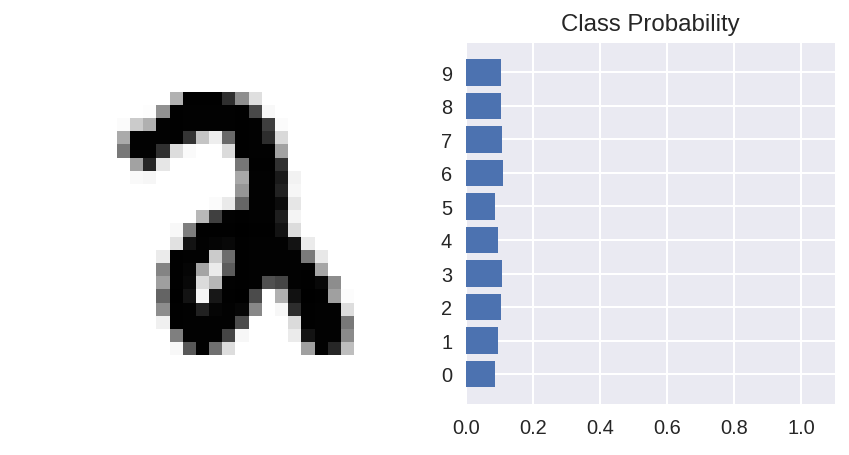

In [32]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to not automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


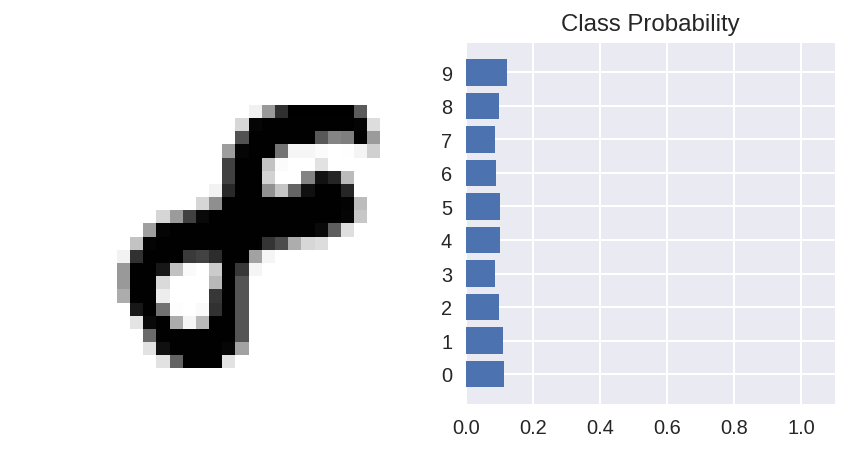

In [35]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
view_classify(images[0].view(1, 28, 28), ps)